Create Customer Segments in Mall Customer Data By Performing K-Means Algo.

In [30]:
import pandas as pd
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


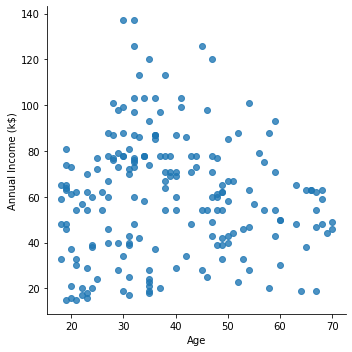

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="Age", y ="Annual Income (k$)",data = df, fit_reg=False, height=5)
plt.show()

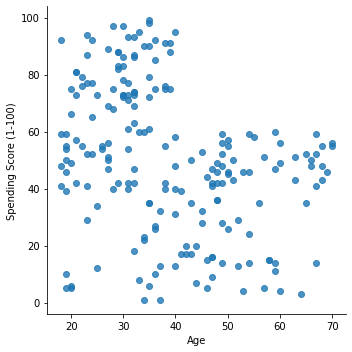

In [5]:
sns.lmplot(x="Age", y ="Spending Score (1-100)",data = df, fit_reg=False, height=5)
plt.show()

In [31]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df.Gender.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ['Male' if i==1 else 'Female' for i in range(2)]) 
df = pd.concat([df, dfOneHot], axis=1)
pd.set_option('display.expand_frame_repr',True)
#droping the country column 
df1= df.drop(['Gender'], axis=1) 
#printing to verify 
print(df1.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Female  Male
0           1   19                  15                      39     0.0   1.0
1           2   21                  15                      81     0.0   1.0
2           3   20                  16                       6     1.0   0.0
3           4   23                  16                      77     1.0   0.0
4           5   31                  17                      40     1.0   0.0


In [32]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(df1)

KMeans(n_clusters=3)

In [33]:
cluster.cluster_centers_

array([[166.5       ,  36.04411765,  88.91176471,  50.20588235,
          0.54411765,   0.45588235],
       [ 31.01639344,  36.91803279,  30.36065574,  49.73770492,
          0.60655738,   0.39344262],
       [ 96.98591549,  43.1971831 ,  59.35211268,  50.5915493 ,
          0.53521127,   0.46478873]])

In [34]:
cluster.labels_ # For every data point - which cluster does it belong to

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [35]:
df1["cluster_id"] = cluster.labels_

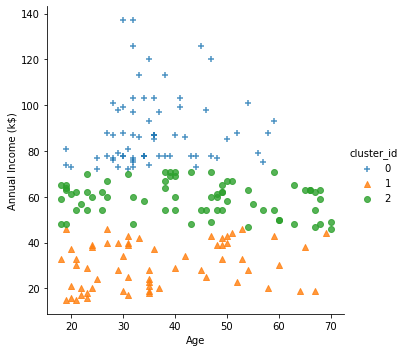

In [38]:
markers = ["+", "^", "o"]
sns.lmplot(x = "Age", y="Annual Income (k$)", 
           data = df1,
           hue="cluster_id",
           fit_reg=False,
           markers= markers,
           height= 5)
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(df[["Age","Annual Income (k$)"]])
scaled_df[:5]

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

In [40]:
cluster_new = KMeans(3,random_state=5)
cluster_new.fit(scaled_df)
df1["scaled_clusterid"] = cluster_new.labels_

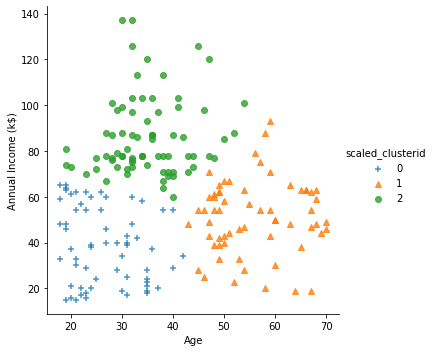

In [41]:
markers = ["+", "^", "o"]
sns.lmplot(x = "Age", y="Annual Income (k$)", 
           data = df1,
           hue="scaled_clusterid",
           fit_reg=False,
           markers= markers,
           height= 5)
plt.show()